In [1]:
# all import statements 

from IPython.display import Image
import logging
logger = logging.getLogger()
logger.setLevel('INFO')
import matplotlib
matplotlib.use('nbagg')
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (40, 40)
import networkx as nx
from sklearn.preprocessing import minmax_scale

# importing own modules
import comment_thread as ct
import author_network as an
import multi_comment_thread as mct
from notebook_helper.process_data import *
from notebook_helper.access_funs import *
from plotting.threads import *
from plotting.network import *
from plotting.overview import *
from plotting.heatmap import *
from plotting.components import *

SBSTYLE = 'seaborn-talk'

%load_ext autoreload
%autoreload 2

In [2]:
PM_FRAME = concatenate_project_dfs(
            process_pms(*range(1, 13)))
ALL_AUTHORS = set.union(*PM_FRAME['all threads', 'authors'].tolist())

# Tracking common information and public announcements in Polymath.
# A data-driven and logically informed method
### Patrick Allo
#### Oxford Internet Institute

# Main goal

+ Address a methodological issue related to the study of Polymath.
+ Use this as an excuse to address some more general aspects of the Polymath-projects.
+ Motivate and develop a new kind of connection between logic and social network analysis.

# Prelude: Two perspectives on Polymath

## Polymath as a resource of mathematics in action

1. An explicit record of proof-search, ready to be mined by all interested parties.
2. **Dilemma:** either a new kind of practice, or a means to study existing practices.
3. Leaves many aspects under-exposed, including social and technological aspects. (Do we look at the online interaction as a way to understand proof-search in general; even by individual mathematicians?)
4. Doesn't automatically address the diverse epistemic goals that seem to motivate Polymath-like enterprises.

## Polymath as a kind of e-research

1. Putting Polymath in perspective: scale (really massive?), technology, purpose, style, ...
2. Blind-spot or at least underexplored case-study within this type of literature.
3. It is a kind of e-research, crowd-science, and citizen-science, but it is an outlier in almost any respect.
4. Focus on social organisation, and less on argumentative form (mathematical content remains out of focus).
5. Study (and modelling) of Polymath requires a different kind of methodology than other types of e-research.


# Some defining features

+ Not really massive.
    + Polymath-community of less than 500 participants.
    + Gowers expected “dozens,” but the bulk of contributions only came from a handful of participants.
    + Contrast: Zooniverse projects reached between 3,186 and 28,828 participants in their first 180 days (Sauermann and Franzoni 2015).
+ The role of technology is limited.
    + Readily available tools (Wordpress, wiki, $\LaTeX$-plugin as a crucial element).
    + No *hard-coded* aggregation of contributions or error-correction.
+ No fixed division of labour, no rigidly identified sub-tasks (“ill-structured problems” Franzoni & Sauermann 2014).

+ The typical ideology of crowd-science (leveraging unused epistemic resources, and making science more efficient) does not seamlessly apply.
    + No exclusive focus on “results”.
    + High pace and yet also “Slow science”:
    
    *I think with a large collaboration of this kind we can aim not only for success in settling the problems (which is, of course, the central goal) but also for higher standards in explaining the proof, improving the argument, making sure it is locally correct and detailed (hyperlinks can even allow to give details that are necessary for some while obvious for others), and in the exposition level of the paper. Since everything is in the open there is no preasure to rush on these matters.* (Gil Kalai, comment of March 15, 2009)

+ **Conjecture:** the difference between the Polymath-projects and Zooniverste-style crowd-science should not be reduced to the nature of mathematical research. It's not just the structure of the problems, but also the difference in motivation.

# How to study the Polymath-projects?

### 1. Take into account a wider range of epistemic goals

+ Beyond an exclusive focus on epistemic efficiency and reliability.
+ Making partial results and un-used ideas accessible for re-use is a worthwhile outcome.
+ Exposing the inner-workings of research in mathematics is valuable in itself.
+ Absence of explicit identification and attribution of sub-tasks is related to nature of the problem *and* to the goal of making the process visible.

### 2. Look at Polymath as an epistemic community

+ Aggregation as a distributed and inherently social process (“argumentation as aggregation”).
    + There is no fixed aggregating-procedure, and presumably not even a central aggregator.

+ Accounts for several other features of the Polymath-projects:
    + Lack of strict hierarchy.
    + Polymath is not a platform, but a set of rules to organise collaboration within a community (high pace and small contributions to minimise increase of information-assymetry).
    + Diversity of epistemic goals.
    + Account for fact that the research-agenda is crowd-sourced as well.
    + Importance of creating the right community (as opposed to crowd-sourcing enough input, or efficiently processing that input).

+ Importance of efficiently organising access to information for the whole community, rather than allocating small tasks.

# Social network-analysis applied to Polymath

## A quick reminder

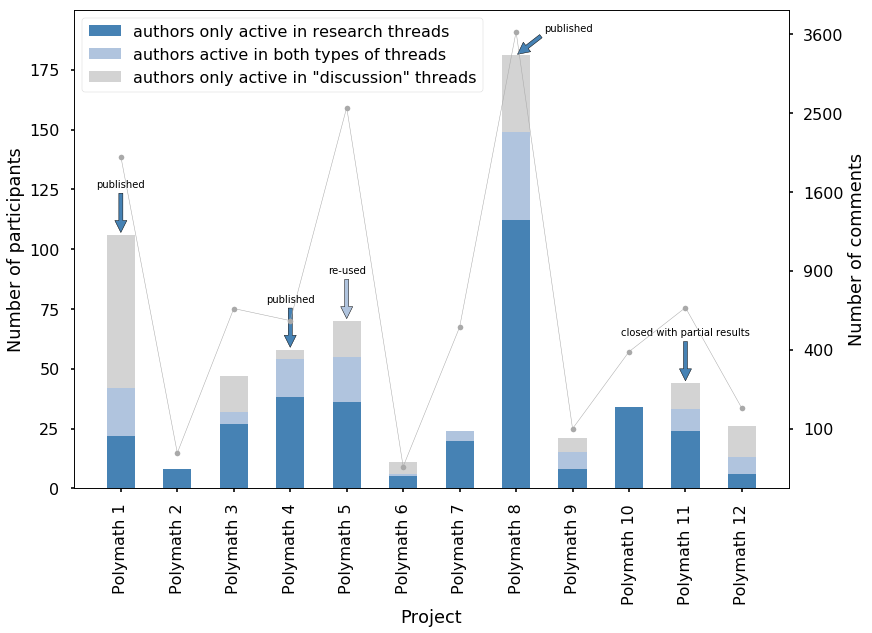

In [3]:
plot_overview(PM_FRAME, annotate=True)

## Polymath as a network of communities

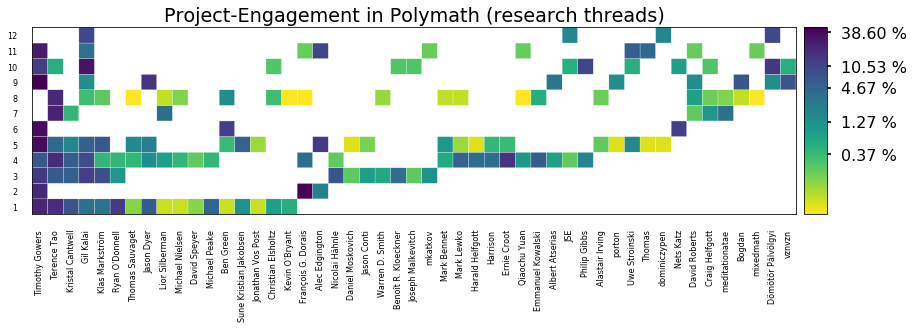

In [4]:
author_project_res, indices_res, select_2_res, title_res = project_participation_evolution(PM_FRAME, ALL_AUTHORS, research_only=True)
authors_2_res = [author for author, bool in select_2_res.items() if bool]
plot_heatmap(*general_heatmap(PM_FRAME, ALL_AUTHORS,
                              authors=authors_2_res,
                              thread_level=False,
                              thread_type='research threads',
                              cluster_projects=False,
                              cluster_authors=False,
                              binary=False,
                              scale_data=True),
             log=True)

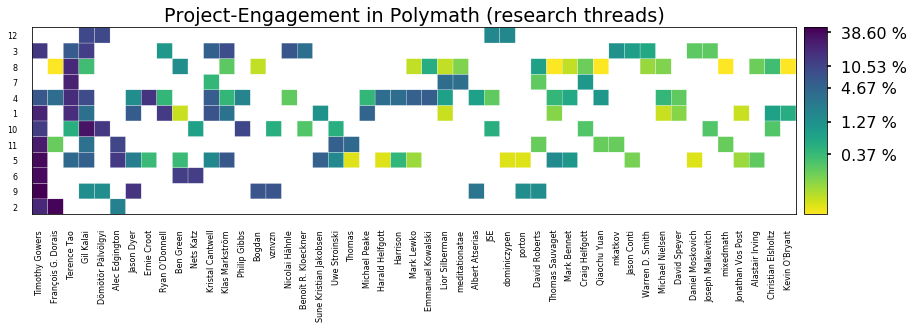

In [5]:
plot_heatmap(*general_heatmap(PM_FRAME, ALL_AUTHORS,
                              authors=authors_2_res,
                              thread_level=False,
                              thread_type='research threads',
                              cluster_projects=True,
                              binary=False,
                              scale_data=True,
                              method='average'),
             log=True)

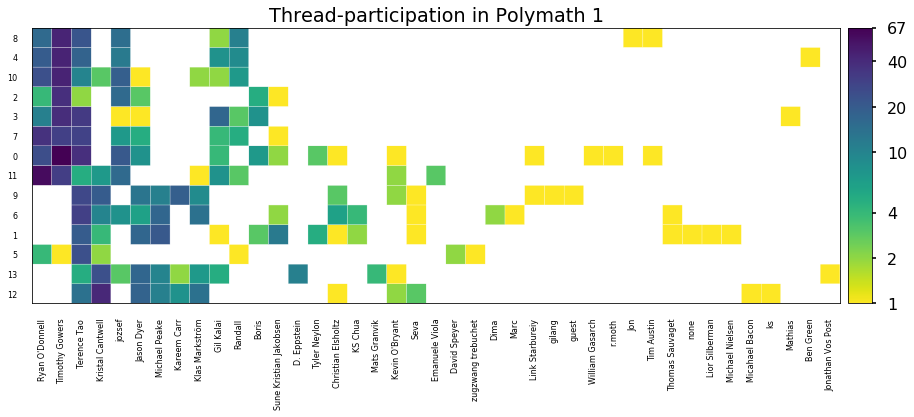

In [6]:
project_heatmap(PM_FRAME, "Polymath 1", log=True, thread_type="research threads", method="average")

## Polymath-projects as interaction-networks

In [7]:
PM4_FOCUS={'project': "Polymath 4", 'thread_type': "research threads", 'stage':3}

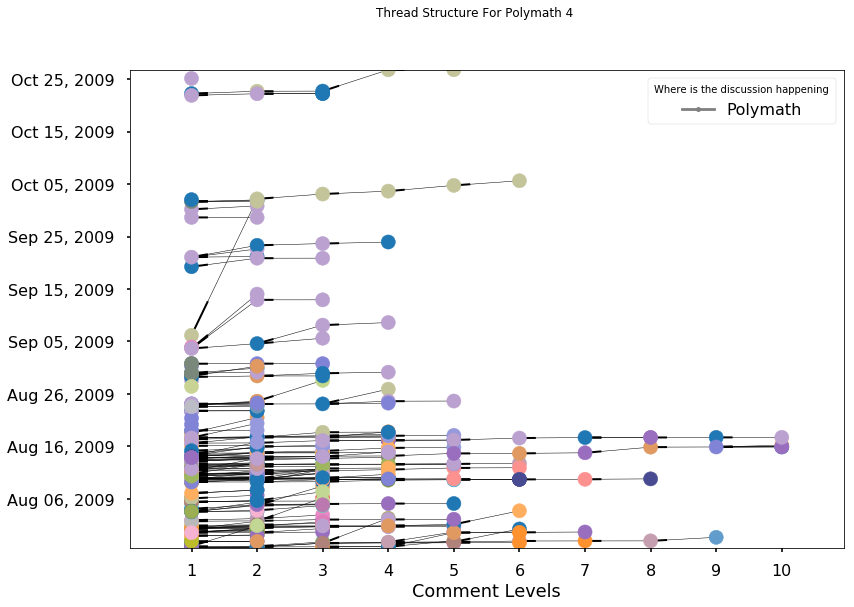

In [8]:
plot_discussion_tree(PM_FRAME, **PM4_FOCUS)

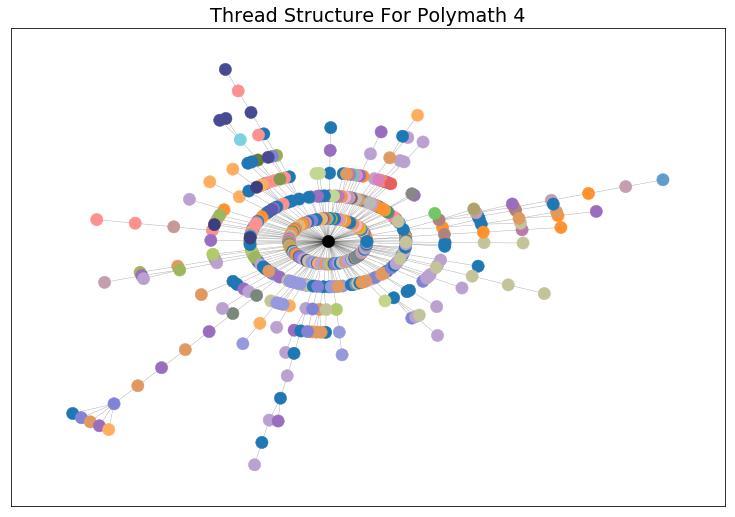

In [9]:
plot_discussion_tree_radial(PM_FRAME, **PM4_FOCUS)

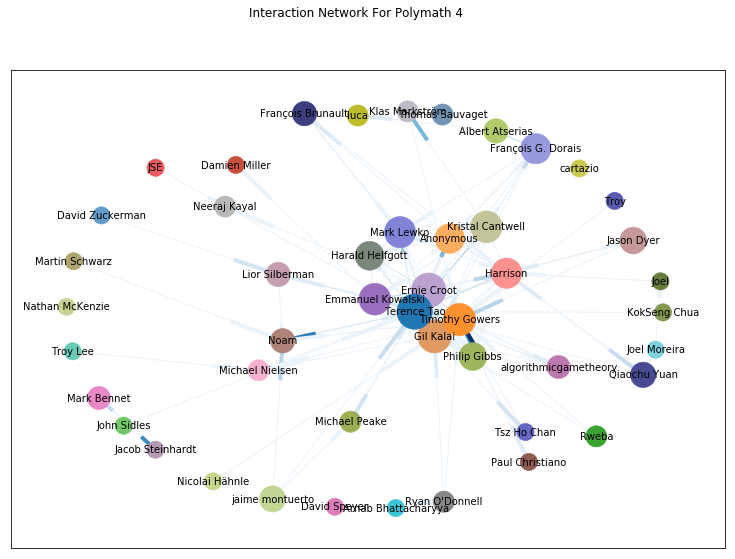

In [10]:
draw_network(PM_FRAME, **PM4_FOCUS, fontsize=10)

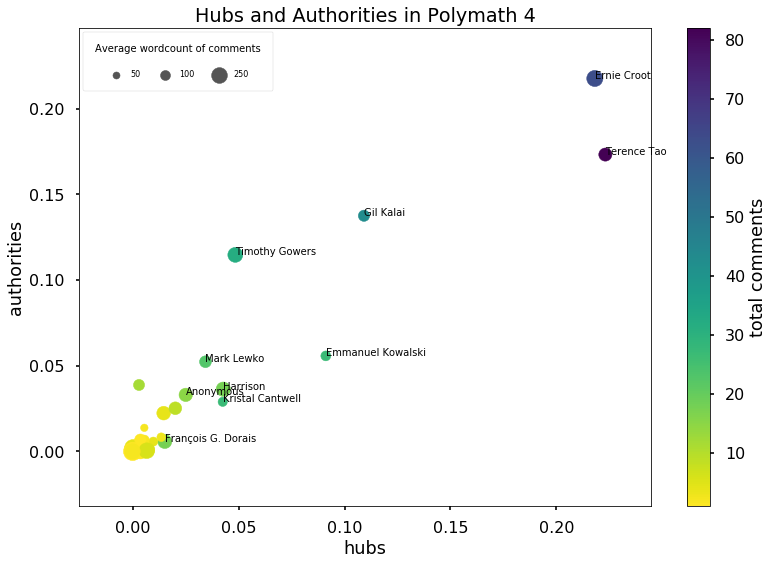

In [11]:
plot_scatter_authors_hits(PM_FRAME, **PM4_FOCUS, fontsize=10)

+ Distinguishing different roles: “main author”, “co-authors”, “to be acknowledged”.
+ Hubs and out-degree as a way to track aggregator-roles.

# From patterns of interaction to patterns of collaboration

## Insights from logics for teamwork

+ “What it means for a group of agents to have a *collective intention*, and then a *collective commitment* to achieve a common goal.” (Dunin-Keplicz & Verbrugge, 2010)
+ Awareness of the status of the group-effort is key.

## Formal background

+ Individual intentions, goals, and beliefs are primitive normal modal operators.
+ Goals and intentions are positively and negatively introspective (belief).
+ Individual intentions are sufficient for individual goals.


+ General Int: $\mathsf{E-INT}_G \phi \leftrightarrow \bigwedge_{i \in G} \mathsf{INT}_i \phi$.
+ Mutual Int: $\mathsf{M-INT}_G \phi \leftrightarrow \mathsf{E-INT}_G(\phi \wedge \mathsf{M-INT}_G \phi)$.
+ Collective Int: $\mathsf{C-INT}_G \phi \leftrightarrow \mathsf{M-INT}_G \phi \wedge \mathsf{C-BEL}_G(\mathsf{M-INT}_G\phi)$.

### Key insights

+ Collective intentions are constitutive for teams: “they integrate the team and help monitor teamwork”.
+ Excluding competition: all agents intend that all the other members share their intentions.
    + Necessary to succeed (links with *task-certainty*),
    + but also to establish trust (e.g. abiding by the Polymath-rules).

+ Establishing mutual intentions does not depend on the communication-medium, but establishing collective intentions does.

+ In practice, a weaker level of awareness of mutual intentions might be sufficient for collective intentions:
    + Pre-collective intention: $\mathsf{M-INT'}_G \phi \leftrightarrow (\mathsf{M-INT}_G \phi \wedge \mathsf{E-INT}_G(\mathsf{C-INT}_G \phi))$
    + Tuning awareness: $\mathsf{C-INT}_G \phi \leftrightarrow \mathsf{M-INT}_G \phi \wedge \mathsf{Awareness}_G(\mathsf{M-INT}_G\phi)$.

+ Moving on from abstract collective intentions to concrete plans and actions requires commitments (with pairwise commitments as primitive notions).

# Applicability to Polymath

+ Distinguishing the *team* from the *community*.
+ Identifying roles within the team.

+ Treating blog-posts as *public announcements* could explain how collective intentions can arise.
+ The overwhelming presence of the central figures in the comment-threads suggests that aggregation isn't limited to the summaries of the blog-posts.
+ This is a specific concern for Polymath, for the teamwork cannot be the result of many centrally coordinated pairwise commitments if there isn't a clear division of labour. 

## The main methodological challenge

Individual comments function as one-to-many announcements (the platform is open), but are they also public announcements?

##### 1. Theoretical mismatch

+ Does not fit existing models of social networks, or of scientific communities (e.g. Zollman 2007).
+ *Proposal:* typology of communities based on announcement-types.

##### 2. Empirical mismatch
+ The available data only gives us an interaction-network.
+ *Proposal:* use timestamp-metadata to establish co-presence.

##### 3. Logical mismatch
+ Online asynchronous communication is a typical example of uncertain communication.
+ *Proposal:* look for good-enough approximations of public announcements.

# Being at the Centre of Discussion

+ Asynchronous online discussions are “spatially” and “temporally” distributed.

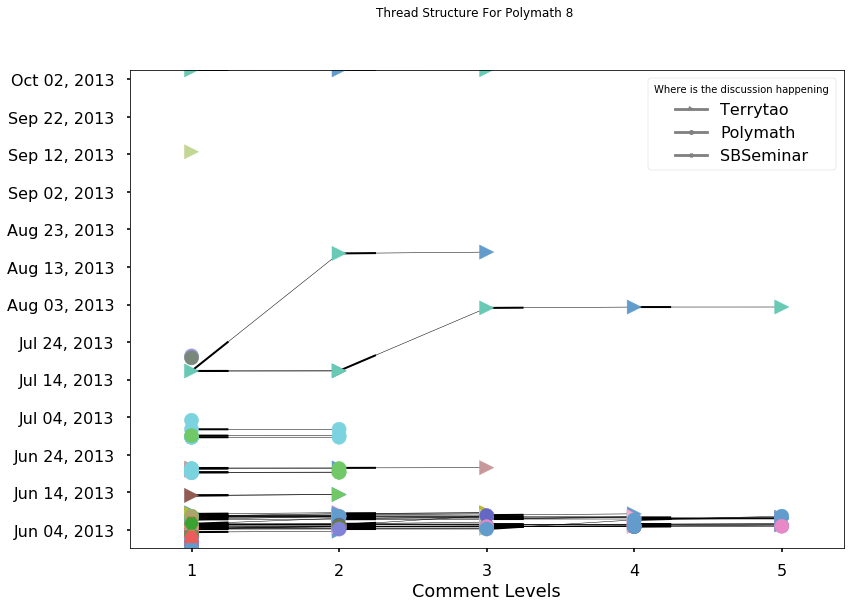

In [12]:
plot_discussion_tree(PM_FRAME, project='Polymath 8', stage=2, thread_type='research threads')

# Being at the Centre of Discussion

+ Asynchronous online discussions are “spatially” and “temporally” distributed.
+ Use this to construct a fine-grained affiliation (co-presence) network to model indirect interactions.
+ Commenting signals presence, and presence is knowable to those that are also present.

## Basic Principles

+ Contributing instantly puts one in the centre of discussion.
+ Moving out of the centre of discussion happens gradually.
+ Closeness to the centre of discussion:
    + signals presence in the centre of discussion, and
    + is sufficient to know who is also close.

## Illustration

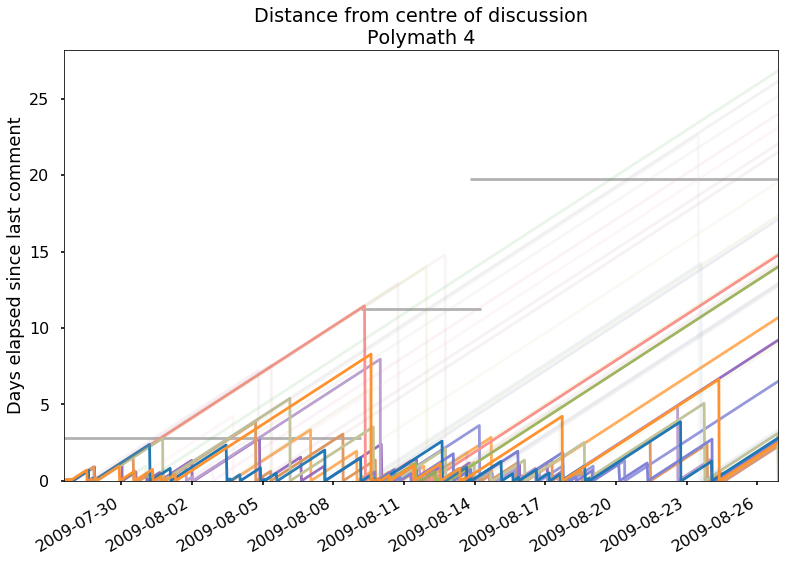

In [13]:
plot_distance_from_centre(PM_FRAME, "Polymath 4", stage=2, thread_type="research threads")

# Transparency of centre of discussion (a logical perspective)

**(TC)** $\mathrm{Close}_i \to (\mathrm{Close}_j \to \mathsf{K}_i \mathrm{Close}_j)$

+ Sufficient to prove $\bigwedge_{i \in G} \mathrm{Close}_i \to \mathsf{C}_G \bigwedge_{i \in G} \mathrm{Close}_i$

![Alt text](FIGS/proof.png)

# Transparency of centre of discussion

**(TC)** $\mathrm{Close}_i \to (\mathrm{Close}_j \to \mathsf{K}_i \mathrm{Close}_j)$

+ Sufficient to prove $\bigwedge_{i \in G} \mathrm{Close}_i \to \mathsf{C}_G \bigwedge_{i \in G} \mathrm{Close}_i$
+ Susceptible to *imprecise knowledge*-style counterexamples.

+ Groups close to the centre of discussion can naturally be identified.

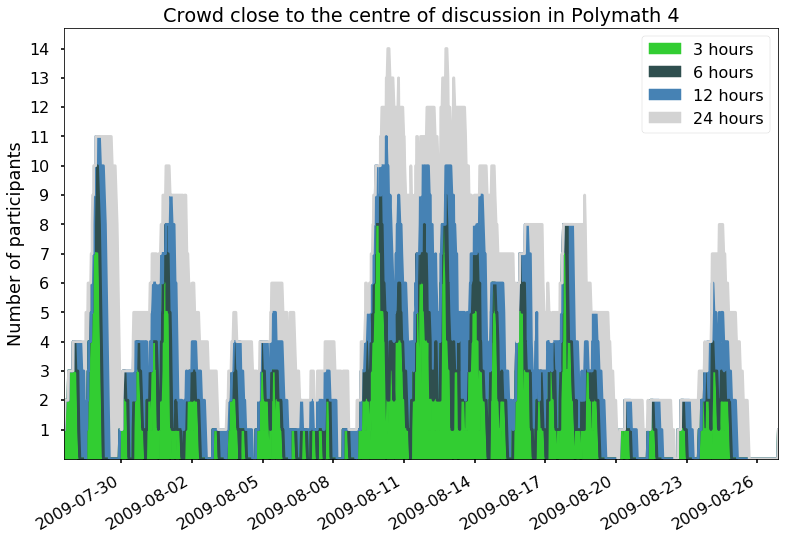

In [14]:
plot_centre_crowd(PM_FRAME, "Polymath 4", stage=2, thread_type="research threads")

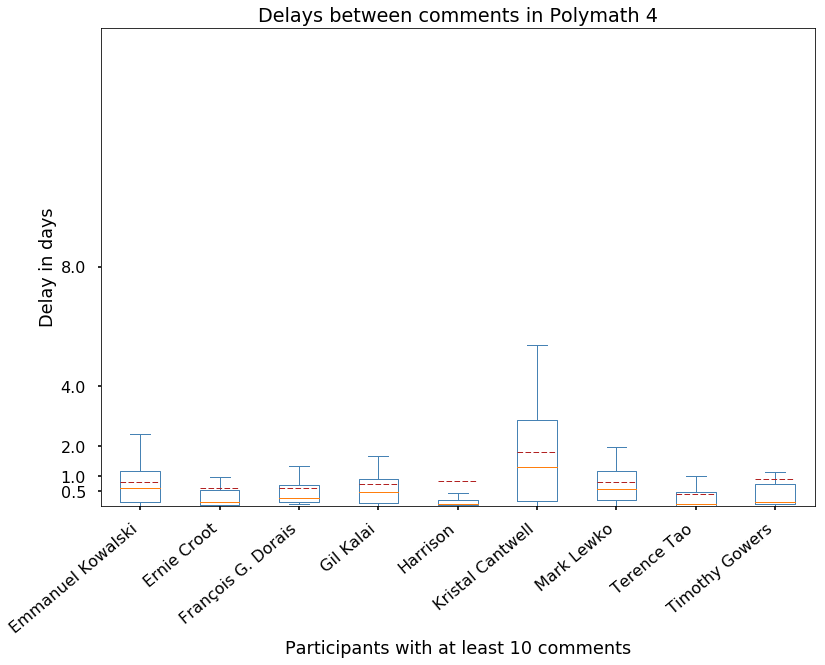

In [15]:
plot_delays_boxplot(PM_FRAME, "Polymath 4", stage=2, thread_type="research threads")

# Identifying episodes of intense interaction

+ Threads as trees *vs* threads as a series of episodes
+ Episodes of intense interaction can be identified through clustering.

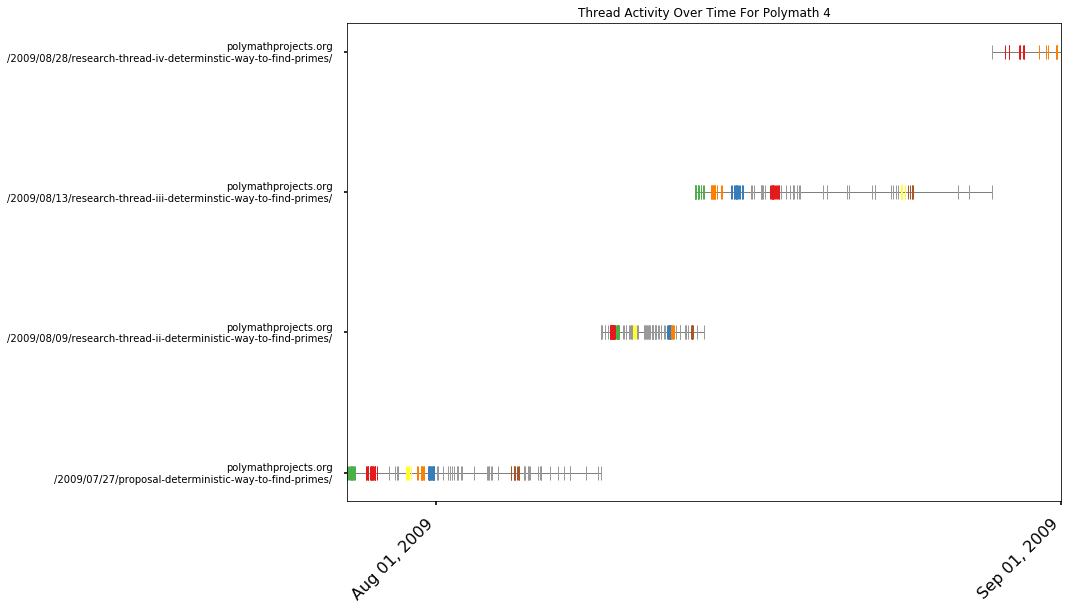

In [17]:
plot_activity_thread(PM_FRAME, "Polymath 4", stage=3, thread_type="all threads", last="2009-09-01")

# Identifying episodes of intense interaction

+ Threads as trees *vs* threads as a series of episodes
+ Episodes of intense interaction can be identified through clustering.
+ Affiliation to an episode refines networks obtained from affiliations to projects or threads.

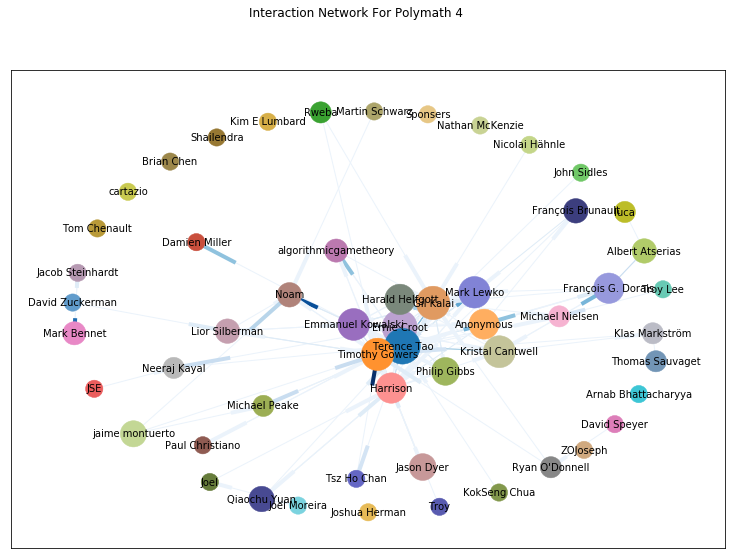

In [18]:
draw_network(PM_FRAME, project="Polymath 4", thread_type="research threads", stage=-1, fontsize=10)

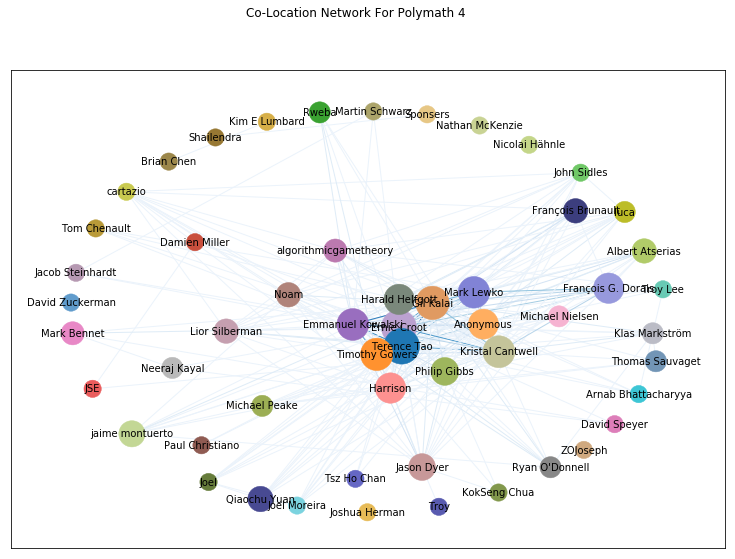

In [19]:
draw_network(PM_FRAME, project="Polymath 4", thread_type="research threads", stage=-1, graph_type="cluster", fontsize=10)

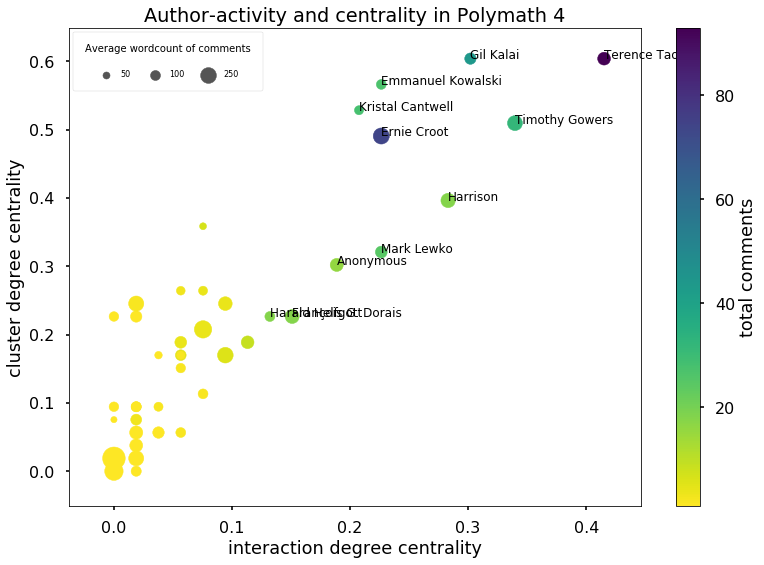

In [20]:
plot_scatter_authors(PM_FRAME, project="Polymath 4", thread_type="research threads", stage=-1,
                     measure="degree centrality",
                     weight={"interaction": 'weight',"cluster": 'weight'},
                    to_undirected=True, thresh=15, fontsize=12)

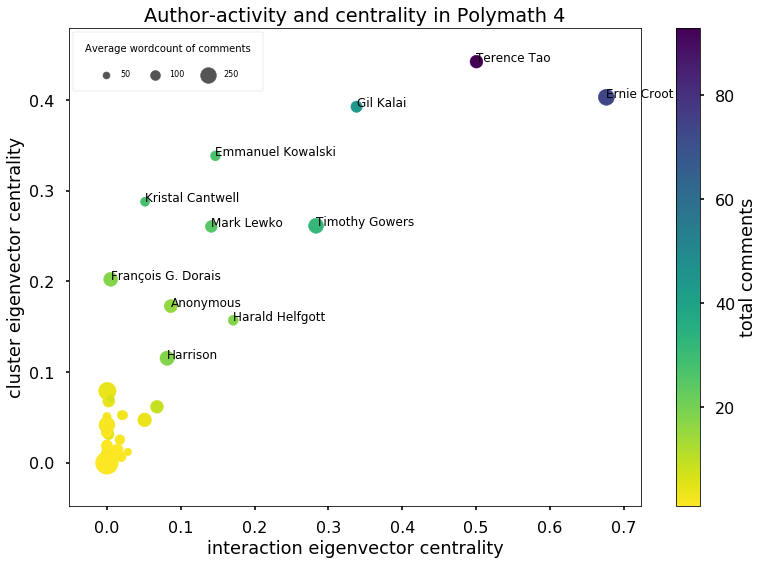

In [21]:
plot_scatter_authors(PM_FRAME, project="Polymath 4", thread_type="research threads", stage=-1,
                     measure="eigenvector centrality",
                     weight={"interaction": 'weight',"cluster": 'weight'},
                    to_undirected=False)

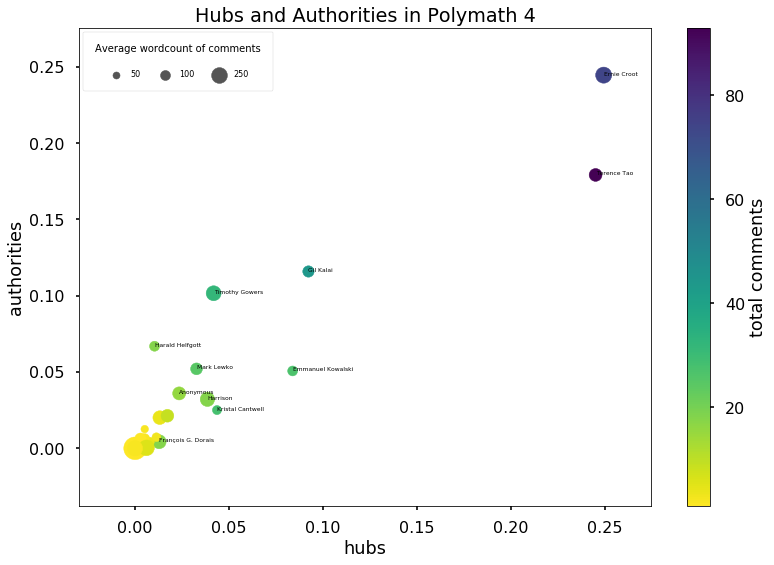

In [22]:
plot_scatter_authors_hits(PM_FRAME, project="Polymath 4", thread_type="research threads", stage=-1)

## Comparing properties of networks (direct interaction)

In [23]:
GRAPH_DATA = DataFrame({'research': get_last(PM_FRAME, "research threads")[0]['research threads', 'network'],
                        'discussion': get_last(PM_FRAME, "discussion threads")[0]['discussion threads', 'network'],
                        'all': get_last(PM_FRAME, "all threads")[0]['all threads', 'network']})

def get_graph(netw, netw_type='i_graph'):
    try:
        out = getattr(netw, netw_type)
    except AttributeError:
        out = np.nan
    return out

GRAPH_DATA["research interaction graph"] = GRAPH_DATA["research"].apply(get_graph)
GRAPH_DATA["research cluster graph"] = GRAPH_DATA["research"].apply(partial(get_graph, netw_type='c_graph'))
GRAPH_DATA["discussion interaction graph"] = GRAPH_DATA["discussion"].apply(get_graph)
GRAPH_DATA["discussion cluster graph"] = GRAPH_DATA["discussion"].apply(partial(get_graph, netw_type='c_graph'))
GRAPH_DATA["interaction graph"] = GRAPH_DATA["all"].apply(get_graph)
GRAPH_DATA["cluster graph"] = GRAPH_DATA["all"].apply(partial(get_graph, netw_type='c_graph'))
GRAPH_DATA = GRAPH_DATA[["interaction graph", "research interaction graph", "discussion interaction graph",
                         "cluster graph", "research cluster graph", "discussion cluster graph"]]
GRAPH_DATA.index = GRAPH_DATA.index.droplevel(1)
GRAPH_DATA = GRAPH_DATA.groupby(GRAPH_DATA.index).last()
GRAPH_DATA = GRAPH_DATA.reindex(['Polymath {}'.format(i) for i in range(1, 13)])

def safe_netw_fun(graph, measure=None, pre_process=None, weight="weight"):
    if pre_process:
        pre_process = methodcaller(pre_process)
        graph=pre_process(graph)
    try:
        out = measure(graph, weight=weight)
    except:
        out = np.nan
    return out

avg_clustering = partial(safe_netw_fun,
                         measure=nx.average_clustering,
                         pre_process="to_undirected")

comments = get_last(PM_FRAME, "all threads")[0]['all threads', 'number of comments (accumulated)']
participants = get_last(PM_FRAME, "all threads")[0]['all threads', 'authors (accumulated)'].apply(len)

r_comments = get_last(PM_FRAME, "research threads")[0]['research threads', 'number of comments (accumulated)']
r_participants = get_last(PM_FRAME, "research threads")[0]['research threads', 'authors (accumulated)'].apply(len)

comments.index = comments.index.droplevel(1)
participants.index = participants.index.droplevel(1)

r_comments.index = r_comments.index.droplevel(1)
r_participants.index = r_participants.index.droplevel(1)

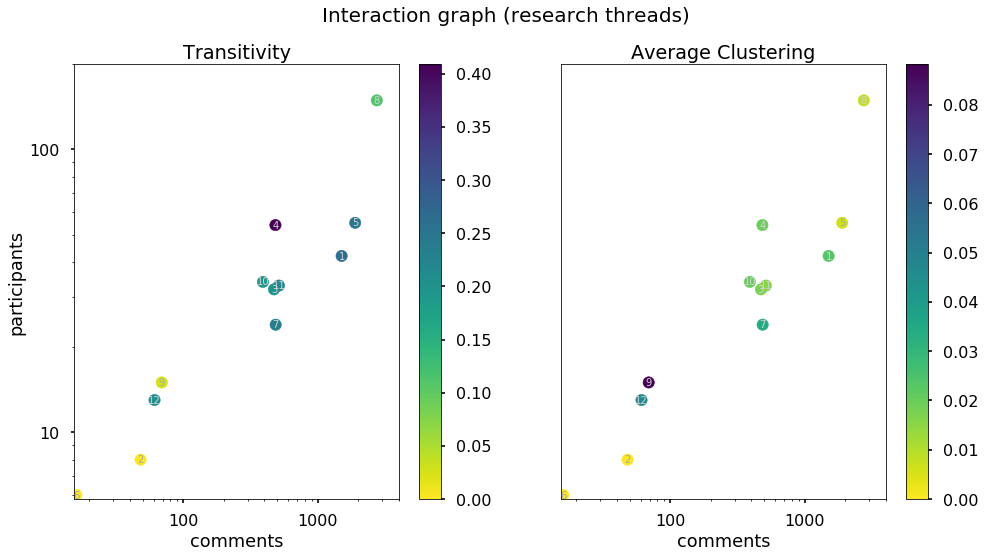

In [24]:
COMPARE3 = DataFrame({'cluster_avg': GRAPH_DATA['research interaction graph'].apply(avg_clustering),
                     'transitivity': GRAPH_DATA['research interaction graph'].apply(nx.transitivity),
                     'comments': r_comments,
                     'participants': r_participants})

fig, axes = plt.subplots(1,2, figsize=(16,8))

COMPARE3.plot(kind="scatter", x="comments", y="participants", c="transitivity", cmap="viridis_r", s=130,
             logx=True, logy=True,
             sharex=False,
             ax=axes[0])
COMPARE3.plot(kind="scatter", x="comments", y="participants", c="cluster_avg", cmap="viridis_r", s=130,
             logx=True, logy=True,
             sharex=False,
             ax=axes[1])

fig.suptitle('Interaction graph (research threads)', fontsize=20)
axes[1].get_yaxis().set_visible(False)
axes[0].set_title('Transitivity')
axes[1].set_title('Average Clustering')
fig.get_axes()[2].set_ylabel('')
fig.get_axes()[3].set_ylabel('')
for i in range(2):
    axes[i].set_ylim([0, 200]);
    axes[i].set_xlim([0, 4000]);
    axes[i].xaxis.set_ticks_position('bottom')
    axes[i].yaxis.set_ticks_position('left')
    axes[i].xaxis.set_major_formatter(
            FuncFormatter(
                lambda y,pos: ('{:.0f}'.format(y))))
    axes[i].yaxis.set_major_formatter(
            FuncFormatter(
                lambda y,pos: ('{:.0f}'.format(y))))
    for label, coords in COMPARE3.iterrows():
        if i == 0 and coords['transitivity'] < 0.06:
            color = "darkgray"
        elif i == 1 and coords['cluster_avg'] < 0.008:
            color = "darkgray"
        else:
            color = "lightgray"
        axes[i].text(coords['comments'], coords['participants'], label.split()[-1],
                     verticalalignment='center', horizontalalignment='center', color=color)

## Comparing properties of networks (episodes)

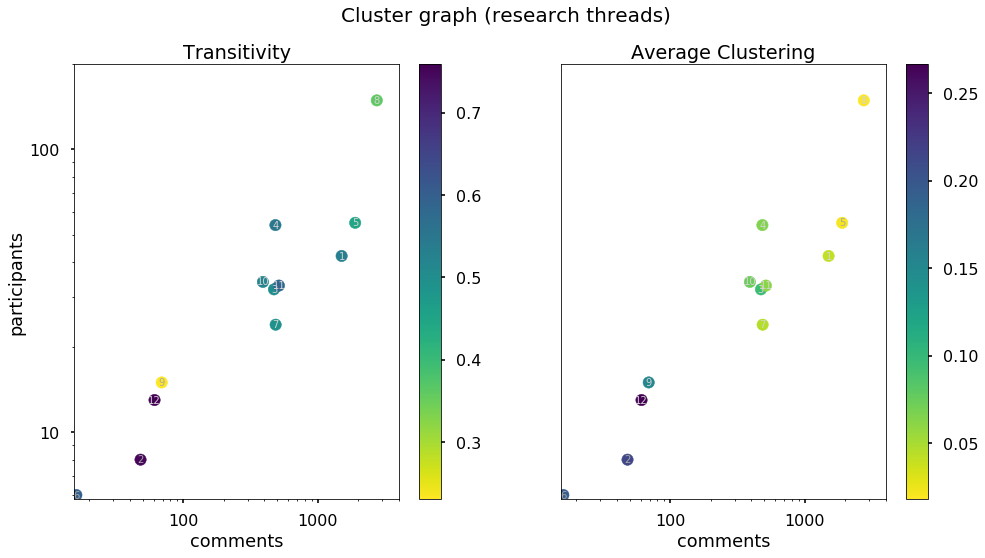

In [25]:
COMPARE4 = DataFrame({'cluster_avg': GRAPH_DATA['research cluster graph'].apply(avg_clustering),
                     'transitivity': GRAPH_DATA['research cluster graph'].apply(nx.transitivity),
                     'comments': r_comments,
                     'participants': r_participants})

fig, axes = plt.subplots(1,2, figsize=(16,8))

COMPARE4.plot(kind="scatter", x="comments", y="participants", c="transitivity", cmap="viridis_r", s=130,
             logx=True, logy=True,
             sharex=False,
             ax=axes[0])
COMPARE4.plot(kind="scatter", x="comments", y="participants", c="cluster_avg", cmap="viridis_r", s=130,
             logx=True, logy=True,
             sharex=False,
             ax=axes[1])

fig.suptitle('Cluster graph (research threads)', fontsize=20)
axes[1].get_yaxis().set_visible(False)
axes[0].set_title('Transitivity')
axes[1].set_title('Average Clustering')
fig.get_axes()[2].set_ylabel('')
fig.get_axes()[3].set_ylabel('')
for i in range(2):
    axes[i].set_ylim([0, 200]);
    axes[i].set_xlim([0, 4000]);
    axes[i].xaxis.set_ticks_position('bottom')
    axes[i].yaxis.set_ticks_position('left')
    axes[i].xaxis.set_major_formatter(
            FuncFormatter(
                lambda y,pos: ('{:.0f}'.format(y))))
    axes[i].yaxis.set_major_formatter(
            FuncFormatter(
                lambda y,pos: ('{:.0f}'.format(y))))
    for label, coords in COMPARE3.iterrows():
        if i == 0 and coords['transitivity'] < 0.06:
            color = "darkgray"
        elif i == 1 and coords['cluster_avg'] < 0.008:
            color = "darkgray"
        else:
            color = "lightgray"
        axes[i].text(coords['comments'], coords['participants'], label.split()[-1],
                     verticalalignment='center', horizontalalignment='center', color=color)

# Episodes and closeness to the centre of discussion

+ Episodes or clusters of intense interaction provide the context needed to decide what counts as *close* to the centre of discussion.
+ This “threshold” is not knowable in the sense of **TC**, but is accessible to us.

+ **Modelling assumption 1:** every participant to an episode is *close* between joining and the end of the episode.
+ **Modelling assumption 2:** all comments in a given episode are public announcements within the group of participants that are close at the end of that episode.

+ The network obtained from the affiliations to episodes is the sum of the equivalence-classes corresponding to groups within which it is at some point common knowledge that they are all close. 

+ We can model a comment $c$ as a public-announcement by associating the episode $e$ it is part of with the announcement-type that treats the content of $c$ as public to all participants that are close during $e$, and uncertain for all other participants.

# Concluding remarks

+ Situating Polymath within the e-research landscape is helpful.

+ The study of Polymath as an epistemic community requires us to take into account the role of group-level attitudes, and one-to-many interactions.

+ Logical insights can guide how we study the kind of interactions that make Polymath-like collaborations epistemically successful.